Name: Sandip Regmi

Labpartner(s): Lilly Elliot

In [1]:
#import statements go here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Class 11.1

#### Announcements

- Reminder **all labs through Lab 9.2 need to have a satisfactory grade (no zeros) by end of the day 4/1 to pass the class.** The last drop date is 4/6. The mastery of this beginning material is needed to complete this course. This includes the functions exercise and the expected grade assignment.

- We are going to do an advanced lab today. For those of you struggling to catch up, you can not worry about this one and focus on previous labs. See syllabus for grading policy.
 
- Lab on Wed will be light on programming, as you have final research proposals this week. More on this on Wednesday, and you will have the oppertunity to work on them in the lab period then. See research proposal assignment on github

# Warmups 11.1

For warmups today you will share your plot animations.

# Lecture 11.1

### Agenda:
- Predator prey modeling. 

## Predator Prey Modeling

See original here: 

https://github.com/numerical-mooc/assignment-bank/blob/master/Lessons.and.Assignments/Predator.Prey.Model/Predator.Prey.Model.ipynb

For a more advanced example in predator prey modeling:

https://waterprogramming.wordpress.com/tag/predator-prey/

Modeling the zombie aplocalypse:

https://scipy-cookbook.readthedocs.io/items/Zombie_Apocalypse_ODEINT.html



###  Lotka-Volterra Equations

The Lotka–Volterra equations, also known as the predator–prey equations, are a pair of first-order, non-linear, differential
equations. They are frequently used to describe the dynamics of biological systems in which two species interact, one as a predator and
the other as prey. You can read more about this from Wikipedia <http://en.wikipedia.org/wiki/Lotka-Volterra_equation>.

### Equations describing the system

 Their populations change with time according to the following pair of equations:

$ dx/dt = x ( \alpha - \beta y  ) $

$ dy/dt = -y( \gamma - \delta x ) $

Where, $x$ is the number of prey (e.g., phytoplankton), $y$ is the number of predators (e.g., zooplankton). $dx/dt, dy/dt$ gives the rate of change of their respective populations over 
time $t$. $\alpha, \beta, \gamma, \delta $ are the parameters describing the interaction between the two species. This models makes some assumptions about 
the predator and prey. You can read about them from the Wikipedia page mentioned above.

The above equations can be written in a slightly different form to interpret the physical meaning of the four parameters used.

1.Rate equation for prey

$dx/dt = \alpha x - \beta x y $

The prey population (x) is presumed to have unlimited supply of food, $\alpha x$ represents the rate of population growth of prey. Rate of decrease of population of prey is assumed to be proportional to the rate at which predator and prey encounter each other, given by $ \beta y x$

2.Rate equation for predator

$ dy/dt = \delta x y -\gamma y $

For the predator population (y), $\delta x y $ gives the rate of growth of predator population. Note that this is similar to the rate of decrease of population of prey. The second term $\gamma y $ gives the rate of population decrease for predators due to natural death or emigration.

### Numerical solution using Python

A simple python code for solving these equations is shown below.

In [2]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [4]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters #U- float, f - function, dt - float
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [5]:
# define the function that represents the Lotka-Volterra equations

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]   #why zero here???
    y = u[1]     #why 1 here??
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])


In [6]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10. #prey
y0 = 2.  #predator
t0 = 0.   #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #two dimension of array for plot.. x & y togetherly

# imput initial conditions
u_euler[0] = np.array([x0, y0])


In [7]:
u_euler

array([[10.,  2.],
       [ 0.,  0.],
       [ 0.,  0.],
       ...,
       [ 0.,  0.],
       [ 0.,  0.],
       [ 0.,  0.]])

In [8]:
# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

We will now plot the variation of population for each species with time.

In [9]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

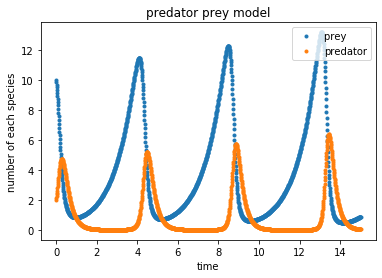

In [10]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

## System behavior

A better understanding of the system behavior can be obtained by a phase plot of the population of predators vs. the population of prey. It will tell us if the system sustains or collapses over time. For the choice of parameters $ \alpha, \beta, \gamma $ and $ \delta $ made above, we see that the maximum population of each species keeps increasing each cycle. You can read more about that in the Wikipedia link mentioned above.

Text(0.5, 1.0, 'predator prey model')

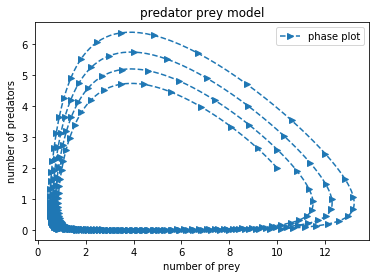

In [11]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

# Lab 11.1

## E.1 How does timestep affect the solution?
Modify the timestep (or time increment) dt. How does this affect your solutions? Plot both the timeseries and the phase plots. Try making dt 10 times bigger (dt = 0.1) and 10 times smaller. Describe what happens to your results. What happens if you make dt 100 times smaller?

In [12]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [13]:
#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)

In [14]:
# define the function that represents the Lotka-Volterra equations

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

In [15]:
# set time-increment and discretize the time
T  = 15.0                          
dt = 0.1                  #Changed time difference to 0.1 as question    
N  = int(T/dt) + 1                  

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

In [16]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

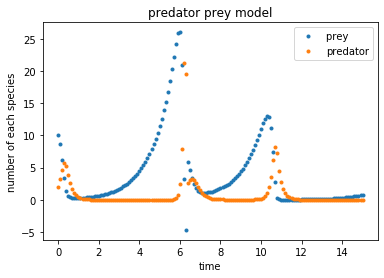

In [17]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

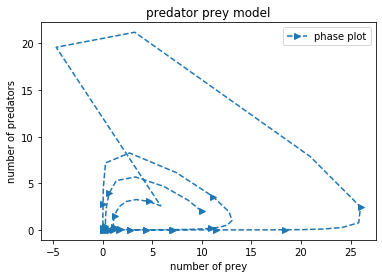

In [18]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [19]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1

In [30]:
# set time-increment and discretize the time
T  = 15.0                           
dt = 0.001        #time change = 100 times                 
N  = int(T/dt) + 1                 

# initial conditions (initial populations):
x0 = 5. #prey
y0 = 5.  #predator
t0 = 0.   #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #two dimension of array for plot.. x & y togetherly

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

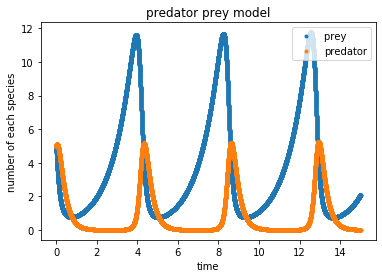

In [31]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

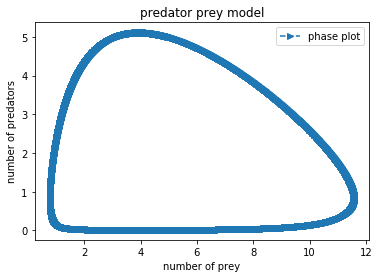

In [23]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

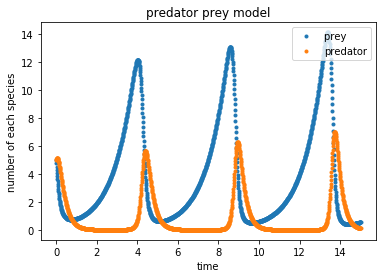

In [28]:
# set time-increment and discretize the time
T  = 15.0                           
dt = 0.01        #time change = 10 times smaller                 
N  = int(T/dt) + 1                 

# initial conditions (initial populations):
x0 = 5. #prey
y0 = 5.  #predator
t0 = 0.   #time

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #two dimension of array for plot.. x & y togetherly

# imput initial conditions
u_euler[0] = np.array([x0, y0])
# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

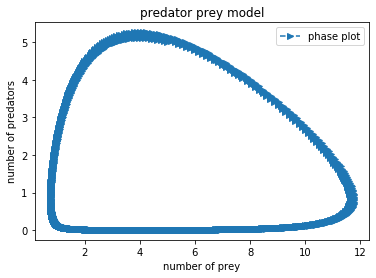

In [32]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [33]:
#As the value of dt is higher, the points are less and the precision is less. And the lower time increment the prey-predator model higher precision points. There will be more points on the plot

## E.2 Adding the steady state

The steady state(s) of the system are found by setting the population equations to zero, that is the solution to when the population is not changing. This is also called a "fixed point" of the equations, since if the populations start there they stay there, i.e. are fixed.

Find the steady states of the system. Plot the fixed point (steady state population) of the system on both the timeseries and phase space plots. Describe where the fixed point is in the phase space plot. What happens if you start at the steady state? What happens if you start near the steady state?

Text(0.5, 1.0, 'predator prey model')

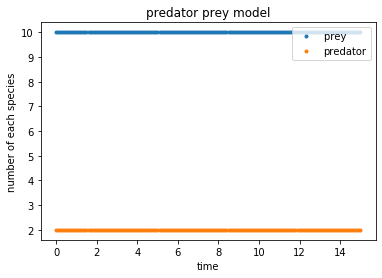

In [34]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1
T  = 15.0                           
dt = 0.01                          
N  = int(T/dt) + 1 

#define the time stepping scheme - Euler forward or "shooting" method

def euler_step(u, f, dt):
    """Returns the solution at the next time-step using Euler's method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    
    return u + dt * f(u)


# define the function that represents the Lotka-Volterra equations

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = gamma/delta
    y = alpha/beta
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                      # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)

    # break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

In [35]:
#Two flat lines indicating no change in prey and predator

Text(0.5, 1.0, 'predator prey model')

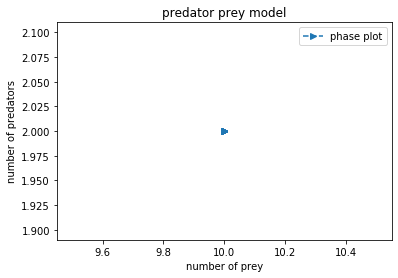

In [37]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [41]:
#Phase plot point indicates the steady state at population of prey and predator..

In [42]:
# What happens if you start at the steady state? 

# Answer - if they start at steady state, they stay fixed as shown in model

In [68]:

def f(u):
    """Returns the rate of change of species numbers.
    
    Parameters
    ----------
    u : array of float
        array containing the solution at time n.
        
    Returns
    -------
    dudt : array of float
        array containing the RHS given u.
    """
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*(gamma - delta*x)])
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 10. #initial prey 
y0 = 2 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]



Text(0.5, 1.0, 'predator prey model')

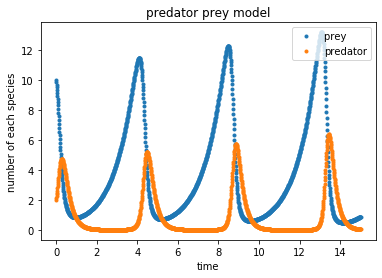

In [71]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
#plots the steady state lines 
plt.legend(loc='upper right')


#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

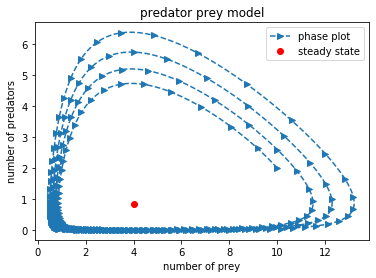

In [70]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.83,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [ ]:
#The steady state is shown on prey number at 4 and predator number closer to 1

Text(0.5, 1.0, 'predator prey model')

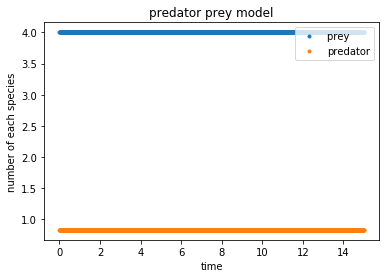

In [79]:


# set time-increment and discretize the time
T  = 15.0  
dt = 0.01                   
N  = int(T/dt) + 1           

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = 0.833 #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
#plots the steady state lines 
plt.legend(loc='upper right')


#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'Predator Prey Model')

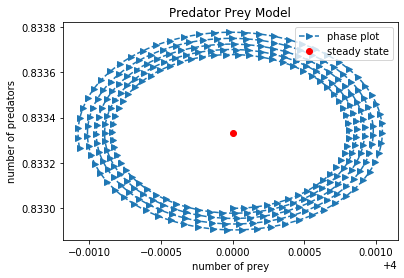

In [82]:

plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.8333,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("Predator Prey Model")

In [83]:
#The population donot change when it starts in steady state

In [84]:
# set time-increment and discretize the time
T  = 15.0  #how long we want to run it for     # final time
dt = 0.01                    # set time-increment
N  = int(T/dt) + 1           # number of time-steps - Total time/time steps

# initial conditions (initial populations):
x0 = 4. #initial prey 
y0 = 1. #initial predators
t0 = 0. # time = 0

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2)) #

# imput initial conditions
u_euler[0] = np.array([x0, y0])

for n in range(N-1):
    u_euler[n+1] = euler_step(u_euler[n], f, dt)
    
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

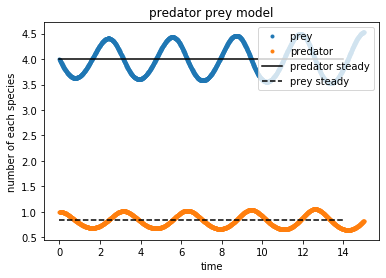

In [85]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.plot([0,14],[4,4], label = "predator steady", color="k")
plt.plot([0,14],[0.83,0.83], label = "prey steady",color="k",linestyle="--")
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

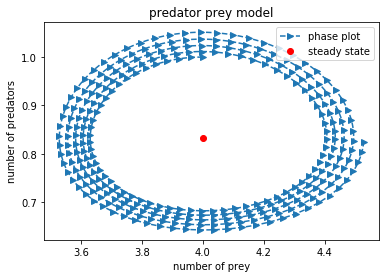

In [86]:
plt.plot(x_euler, y_euler, '-->', markevery=5, label = 'phase plot')
plt.plot(4,0.8333,"ro", label = "steady state")
plt.legend(loc='upper right')
#labels
plt.xlabel("number of prey")
plt.ylabel("number of predators")
#title
plt.title("predator prey model")

In [87]:
# this is good. When it starts closer to steady state the population osciallates around the steady population number..

## Another time stepping method with higher order of accuracy

## E.3 A better algorithm
Do Exercise 1 again with a fourth order time stepping method called "Runge-Kutta 4" whose algorithm is given below. Do your answers differ?

In [88]:
def RK4(u,f,dt):
    # Runge Kutta 4th order method
    """Returns the solution at the next time-step using Runge Kutta fourth order (RK4) method.
    
    Parameters
    ----------
    u : array of float
        solution at the previous time-step.
    f : function
        function to compute the right hand-side of the system of equation.
    dt : float
        time-increment.
    
    Returns
    -------
    u_n_plus_1 : array of float
        approximate solution at the next time step.
    """
    #calculate slopes
    k1 = f(u)
    u1 = u + (dt/2.)*k1
    k2 = f(u1)
    u2 = u + (dt/2.)*k2
    k3 = f(u2)
    u3 = u + dt*k3
    k4 = f(u3)
    return u + (dt/6.)*(k1 + 2.*k2 + 2.*k3 + k4)

In [89]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

In [90]:
# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)

In [91]:
# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model')

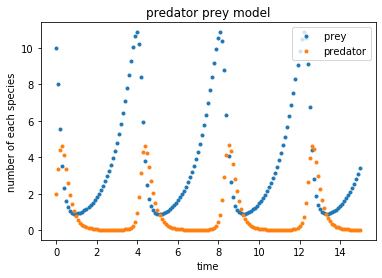

In [92]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

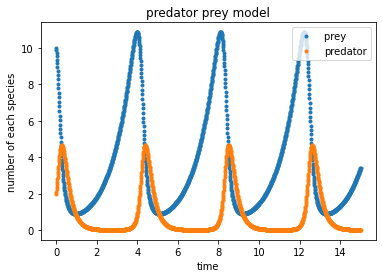

In [60]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.01                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")

Text(0.5, 1.0, 'predator prey model')

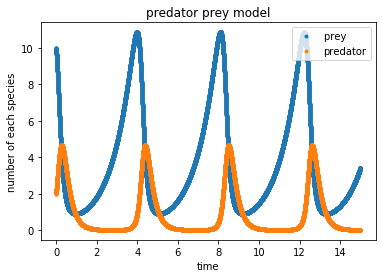

In [93]:
# set the initial parameters
alpha = 1.
beta = 1.2
gamma = 4.
delta = 1.

# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of each species")
#title
plt.title("predator prey model")


Text(0.5, 1.0, 'predator prey model')

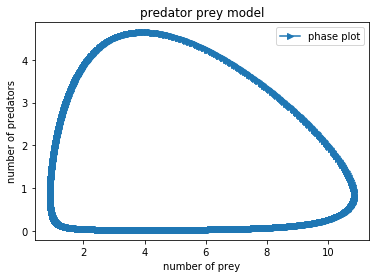

In [101]:
plt.plot(x_euler, y_euler, '->', markevery=5, label = 'phase plot')
plt.legend(loc='upper right')
plt.xlabel("number of prey")
plt.ylabel("number of predators")
plt.title("predator prey model")

In [ ]:
#RK4 method is more accurate since it produces more points

## E.4 Exploring parameter space
Vary the interactions between species by changing $\alpha, \beta, \gamma, \delta$ and see what happens to the population evolution as well as phase plots. How does changing each parameter individually affect the system?

Text(0.5, 1.0, 'predator prey model')

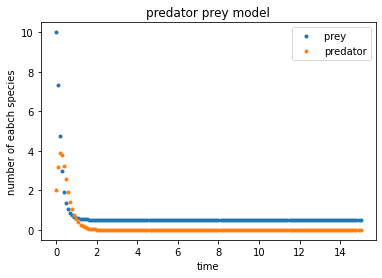

In [62]:
#playing with the parameters
alpha = 0
beta = 1.2 
gamma = 4   
delta = 1.  


# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of eabch species")
#title
plt.title("predator prey model")

In [63]:
#the number of species almost reach to zero or say they dies when paramter alpha is zero....

Text(0.5, 1.0, 'predator prey model')

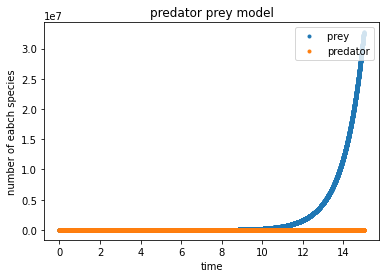

In [64]:
alpha = 1
beta = 0 #beta value zero
gamma = 1.2   
delta = 0.  


# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of eabch species")
#title
plt.title("predator prey model")

In [65]:
#when both the alpha and beta are zero, the prey species spike exponentially in short interval...

Text(0.5, 1.0, 'predator prey model')

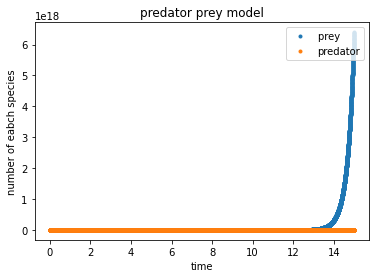

In [66]:
alpha = 3
beta = 2
gamma = 1   
delta = 0.  #


# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.001                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of eabch species")
#title
plt.title("predator prey model")

In [67]:
#delta = zero, there is raise of PREY but the predator yellow line looks flat w.r.t  time...
#the delta x y represents the predator population growth..... so delta zero means predator has got flat lines... and the prey equation is dy/dt = -delta y

Text(0.5, 1.0, 'predator prey model')

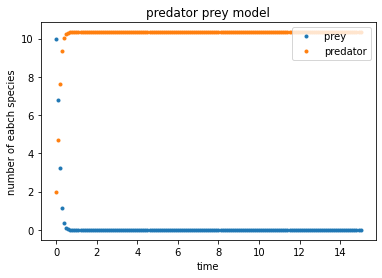

In [68]:
alpha = 0 #p
beta = 1.2 
gamma = 0   
delta = 1.  


# set time-increment and discretize the time
T  = 15.0                           # final time
dt = 0.1                           # set time-increment
N  = int(T/dt) + 1                  # number of time-steps

# initial conditions (initial populations):
x0 = 10.
y0 = 2.
t0 = 0.

# initialize the array containing the solution for each time-step
u_euler = np.zeros((N, 2))

# imput initial conditions
u_euler[0] = np.array([x0, y0])

# use a for loop to call the function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)
    

# break up the solutions for plotting
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
#labels
plt.xlabel("time")
plt.ylabel("number of eabch species")
#title
plt.title("predator prey model")

In [69]:
#the gamma value to zero means the prey species decline and the predator starts increasing.. ALternate relationship

## E.5 (Advanced)
Modify the differential equations to include other types of interactions. See advanced predator prey example link at the top for ideas. You might add in a self-eating (i.e. $-ay^2$) term into the predator equation. Or do the zombie apocalypse example

In [70]:
#Self-eating predator equation [ - alpha * y**2]

In [71]:
def f(u):
    x = u[0]
    y = u[1]
    return np.array([x*(alpha - beta*y), -y*gamma + delta*x*y - alpha*(y**2)])  #Self-eating equation...

In [72]:
#inital parameter setup......
alpha = 1
beta = 1.2
gamma = 4
delta = 1

In [73]:
#set time-increment and discretize the time:
T  = 15.0          #final                 
dt = 0.1                 #set time increment         
N  = int(T/dt) + 1   #number of time-steps

#initial populations assumptions:
x0 = 15
y0 = 8
t0 = 0
#array initialization:
u_euler = np.zeros((N, 2))
#input initial condition
u_euler[0] = np.array([x0, y0])

#loop to call function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)

In [74]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model Self-Eating')

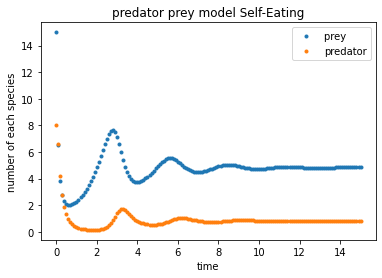

In [75]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("time")
plt.ylabel("number of each species")
plt.title("predator prey model Self-Eating")

In [76]:
#decrement on dt value:

In [77]:
#set time-increment and discretize the time:
T  = 15.0          #final                 
dt = 0.01                 #set time increment         
N  = int(T/dt) + 1   #number of time-steps

#initial populations assumptions:
x0 = 15
y0 = 8
t0 = 0
#array initialization:
u_euler = np.zeros((N, 2))
#input initial condition
u_euler[0] = np.array([x0, y0])

#loop to call function rk2_step()
for n in range(N-1):
    u_euler[n+1] = RK4(u_euler[n], f, dt)

In [78]:
time = np.linspace(0.0, T,N)
x_euler = u_euler[:,0]
y_euler = u_euler[:,1]

Text(0.5, 1.0, 'predator prey model Self-Eating')

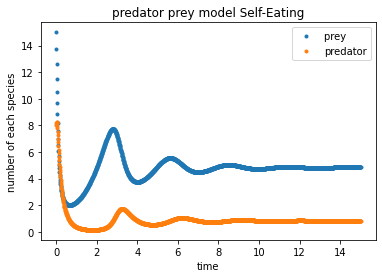

In [79]:
plt.plot(time, x_euler, '.', label = 'prey ')
plt.plot(time, y_euler, '.', label = 'predator')
plt.legend(loc='upper right')
plt.xlabel("time")
plt.ylabel("number of each species")
plt.title("predator prey model Self-Eating")